In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load morphometry data
df_all_cores = pd.read_csv("foram_frag_morphometry.csv", encoding='latin-1')

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_25120/1822374775.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_cores = pd.read_csv("foram_frag_morphometry.csv", encoding='latin-1')


In [3]:
# Separate foraminifera and fragment data
foram_data = df_all_cores[df_all_cores['Type'] == 'Planktonic Formainifera']
fragment_data = df_all_cores[df_all_cores['Type'] == 'Fragments']

In [4]:
# Drop rows with unknown Core ID
foram_data = foram_data[foram_data["Sample"] != "unknown"]
fragment_data = fragment_data[fragment_data["Sample"] != "unknown"]

In [5]:
# Confirm unique core ids 
foram_data['Sample'].unique()

array(['BARP9403', 'BARP9406', 'BARP9409', 'BARP9412', 'BARP9422',
       'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437 ', 'BARP9439',
       'BARP9441', 'BARP9442', 'BARP9443', 'MDB04-2873',
       'MD04-2875B 0-2 Autolabel and Cleaned', 'MD04-2876',
       'MD04-2877 0-2 Autolable and Cleaned', 'MD12-3418C2', 'MD12-3423',
       'MD 76-011', 'MD76-132', 'MD76-133 ', 'MD76-136',
       'MD76-164 0-2 Autolabel and Cleaned', 'MD77-160 ', 'MD77-169',
       'MD77-171 ', 'MD77-178', 'MD77-180 ', 'MD77-182 ', 'MD77-184 ',
       'MD77-185 0-2 Autolabel and Cleaned', 'MD77-195', 'MD77-197',
       'MD77-200', 'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256',
       'MD79-257', 'MD79-260d', 'MD79-261', 'MD79-275', 'MD79-276',
       'MD79-277 0-2 Autolable and Cleaned', 'MD81-345', 'MD85-640',
       'MD90-0936', 'MD90-0938', 'MD90-0939', 'MD90-0940',
       'MD90-0949 0-1 Autolabel and Cleaned',
       'MD90-O955 0-3 Autolabel and Cleaned',
       'MD90-0956 0-2 Autolabel and Cleaned', 'MD90-

In [6]:
# Strictly retrieve Core Ids only
foram_data['core_id'] = foram_data['Sample'].apply(lambda x: x.split(" ")[0])
fragment_data['core_id'] = fragment_data['Sample'].apply(lambda x: x.split(" ")[0])

In [7]:
# Replace wrong texts with their appropriate Core IDs in the Planktonic Formainifera data
foram_data['core_id'] = (foram_data['core_id'].replace("MD", "MD76-011")
                         .replace("MDB04-2873", "MD04-2873")
                         .replace("MD79-260d", "MD79-260")
                         .replace("BARDP9411", "BARP9411") 
                         .replace("MD90-O955", "MD90-0955") 
                         )


# Confirm string replacements
foram_data['core_id'].unique()

array(['BARP9403', 'BARP9406', 'BARP9409', 'BARP9412', 'BARP9422',
       'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437', 'BARP9439',
       'BARP9441', 'BARP9442', 'BARP9443', 'MD04-2873', 'MD04-2875B',
       'MD04-2876', 'MD04-2877', 'MD12-3418C2', 'MD12-3423', 'MD76-011',
       'MD76-132', 'MD76-133', 'MD76-136', 'MD76-164', 'MD77-160',
       'MD77-169', 'MD77-171', 'MD77-178', 'MD77-180', 'MD77-182',
       'MD77-184', 'MD77-185', 'MD77-195', 'MD77-197', 'MD77-200',
       'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256', 'MD79-257',
       'MD79-260', 'MD79-261', 'MD79-275', 'MD79-276', 'MD79-277',
       'MD81-345', 'MD85-640', 'MD90-0936', 'MD90-0938', 'MD90-0939',
       'MD90-0940', 'MD90-0949', 'MD90-0955', 'MD90-0956', 'MD90-0957',
       'MD90-0958', 'MD90-0959', 'MD90-0960', 'MD90-0961', 'MD90-0963',
       'MD96-2044', 'MD96-2045', 'MD96-2049', 'MD96-2051', 'MD96-2053',
       'MD96-2054', 'MD96-2055', 'MD96-2056', 'MD96-2058', 'MD96-2059',
       'MD96-2060', 'MD96-2061

In [8]:
# Replace wrong texts with their appropriate Core IDs in the fragments data
fragment_data['core_id'] = (fragment_data['core_id'].replace("MD", "MD76-011")
                         .replace("MDB04-2873", "MD04-2873")
                         .replace("MD79-260d", "MD79-260")
                         .replace("BARDP9411", "BARP9411") 
                         .replace("MD90-O955", "MD90-0955") 
                         )

# Confirm string replacements
fragment_data['core_id'].unique()

array(['BARP9411', 'BARP9403', 'BARP9406', 'BARP9409', 'BARP9412',
       'BARP9422', 'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437',
       'BARP9439', 'BARP9441', 'BARP9442', 'BARP9443', 'MD04-2873',
       'MD04-2875B', 'MD04-2876', 'MD04-2877', 'MD12-3418C2', 'MD12-3423',
       'MD76-011', 'MD76-132', 'MD76-133', 'MD76-136', 'MD76-164',
       'MD77-160', 'MD77-169', 'MD77-171', 'MD77-178', 'MD77-180',
       'MD77-182', 'MD77-184', 'MD77-185', 'MD77-195', 'MD77-197',
       'MD77-200', 'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256',
       'MD79-257', 'MD79-260', 'MD79-261', 'MD79-275', 'MD79-276',
       'MD79-277', 'MD81-345', 'MD85-640', 'MD90-0936', 'MD90-0938',
       'MD90-0939', 'MD90-0940', 'MD90-0949', 'MD90-0955', 'MD90-0956',
       'MD90-0957', 'MD90-0958', 'MD90-0959', 'MD90-0960', 'MD90-0961',
       'MD90-0963', 'MD96-2044', 'MD96-2045', 'MD96-2049', 'MD96-2051',
       'MD96-2053', 'MD96-2054', 'MD96-2055', 'MD96-2056', 'MD96-2058',
       'MD96-2059', 'MD96-2060'

In [9]:
# Load data containing target Core IDs
df_target_cores = pd.read_csv("dissolution_manuscript_final.csv")

In [10]:
# Extract target core ids
target_cores = df_target_cores.iloc[ : , 0]
target_cores = list(target_cores)

In [11]:
# Create new planktonic foraminifera DataFrame based on target Core IDs
df_foram = foram_data[foram_data['core_id'].isin(target_cores)]

In [12]:
# Create new fragment DataFrame based on target Core IDs
df_fragment = fragment_data[fragment_data['core_id'].isin(target_cores)]

In [13]:
# Confirm no target core is missing
missing_target_cores_foram = []

missing_target_cores_foram.extend(
    core for core in target_cores if core not in df_foram['core_id'].unique()
)

# Show list of missing target cores
print(missing_target_cores_foram) # Should return an empty list if no core is missing

[]


In [14]:
# Confirm no target core is missing
missing_target_cores_frag = []

missing_target_cores_frag.extend(
    core for core in target_cores if core not in df_fragment['core_id'].unique()
)

# Show list of missing target cores
print(missing_target_cores_frag) # Should return an empty list if no core is missing

[]


In [15]:
# Group each data by sample (Core ID)
forams_grouped = df_foram.groupby('core_id')
fragments_grouped = df_fragment.groupby('core_id')

## Remove Outliers

In [16]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: The Pandas DataFrame.
        column: The name of the column to remove outliers from.

    Returns:
        A new DataFrame with the outliers removed.
    """

    # Calculate quantiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [17]:
def get_foram_working_data():
    """
    Processes foram data by removing outliers for each unique core_id and 
    concatenates the results into a single DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the processed data for all samples.
    """
    result = pd.DataFrame()
    for sample in df_foram['core_id'].unique():
        foram_data = forams_grouped.get_group(sample)
        processed_data = remove_outliers_iqr(foram_data, 'Diameter')
        result = pd.concat([result, processed_data])
    return result

In [18]:
def get_frag_working_data():
    """
    Processes fragment data by removing outliers for each unique core_id and 
    concatenates the results into a single DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the processed data for all samples.
    """
    frag_result = pd.DataFrame()
    for sample in df_fragment['core_id'].unique():
        fragment_data = fragments_grouped.get_group(sample)
        frag_processed_data = remove_outliers_iqr(fragment_data, 'Diameter')
        frag_result = pd.concat([frag_result, frag_processed_data])
    return frag_result

In [19]:
# Store groups without outliers in a new variable
foram_df_no_outliers = get_foram_working_data()
frag_df_no_outliers = get_frag_working_data()

In [20]:
# Create groups by unique core_id
foram_no_outlier_grouped = foram_df_no_outliers.groupby('core_id')
frag_no_outlier_grouped =  frag_df_no_outliers.groupby('core_id')

## Run Vif (multicollinearity test)

### Forams

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def calculate_vif(df, features):
    """Calculates VIF for specified features in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the features.
        features (list): List of feature names for VIF calculation.

    Returns:
        pd.DataFrame: VIF results for each feature.
    """

    X = df[features]  # Select features for VIF
    X = X.dropna()  # Drop rows with missing values


    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create a DataFrame with the standardized data
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_scaled_df.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

    return vif_data

In [22]:
def create_vif_data():
    all_features = []  # List to store features for each sample

    for sample in foram_df_no_outliers['core_id'].unique():
        # Forams metrics
        foram_data = foram_no_outlier_grouped.get_group(sample)
        variance_forams = np.var(foram_data['Diameter'], ddof=1)  # Sample variance
        diameter_forams = foram_data['Diameter'].mean()
        circularity_forams = foram_data['Circularity'].mean()
        solidity_forams = foram_data['Solidity '].mean()
        eccentricity_forams = foram_data['Eccentricity'].mean()
        area_forams = foram_data['Areamm2'].mean()
        perimeter_forams = foram_data['Perimeterm2'].mean()
        roundness_forams = foram_data['Roundnessm'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()

        # Append the feature list for the current sample
        all_features.append([variance_forams,  circularity_forams, 
                             
                             roundness_forams,   kurtosis_forams
        ])
    # diameter_forams, area_forams, eccentricity_forams,solidity_forams, perimeter_forams,
    # Create DataFrame after collecting all features
    vif_data = pd.DataFrame(all_features, columns=['variance_forams', 'circularity_forams',                            
                            'roundness_forams', 'kurtosis_forams'
    ])

    return vif_data

In [23]:
df_foram_X = create_vif_data()
feature_foram = ['variance_forams', 'circularity_forams', 
            
            'roundness_forams',  'kurtosis_forams'
        ]

calculate_vif(df_foram_X, feature_foram)

,Feature,VIF
0,variance_forams,1.505644
1,circularity_forams,1.974038
2,roundness_forams,1.899481
3,kurtosis_forams,1.904695


## Fragments

In [24]:
def create_frag_vif_data():
    all_features = []  # List to store features for each sample

    for sample in frag_df_no_outliers['core_id'].unique():
        # Forams metrics
        fragment_data = frag_no_outlier_grouped.get_group(sample)
        variance_frag = np.var(fragment_data['Diameter'], ddof=1)  # Sample variance
        diameter_frag = fragment_data['Diameter'].mean()
        circularity_frag = fragment_data['Circularity'].mean()
        solidity_frag = fragment_data['Solidity '].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = fragment_data['Areamm2'].mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()
        roundness_frag = fragment_data['Roundnessm'].mean()
        kurtosis_frag = fragment_data['Kurtosis'].mean()

        # Append the feature list for the current sample
        all_features.append([variance_frag, diameter_frag, circularity_frag,
              eccentricity_frag, kurtosis_frag,
              
        ])
    # area_frag, perimeter_frag, roundness_frag, solidity_frag, 
    # Create DataFrame after collecting all features
    frag_vif_data = pd.DataFrame(all_features, columns=[
    'variance_frag', 'diameter_frag', 'circularity_frag',
              'eccentricity_frag', 'kurtosis_frag',              
            
    ])

    return frag_vif_data

In [25]:
df_frag_X = create_frag_vif_data()
feature_frag = ['variance_frag', 'diameter_frag', 'circularity_frag',
              'eccentricity_frag', 'kurtosis_frag', 
               ]

calculate_vif(df_frag_X, feature_frag)

,Feature,VIF
0,variance_frag,3.384251
1,diameter_frag,3.897335
2,circularity_frag,2.809004
3,eccentricity_frag,4.162603
4,kurtosis_frag,1.584891


## Forams + Fragments

In [26]:
def create_full_vif_data():
    all_features = []  # List to store features for each core/sample

    # Get the common core IDs present in both datasets
    common_core_ids = set(df_foram['core_id'].unique()) & set(df_fragment['core_id'].unique())

    for core_id in common_core_ids:
        # Forams metrics
        foram_data = foram_no_outlier_grouped.get_group(core_id)
        variance_forams = np.var(foram_data['Diameter'], ddof=1)  # Sample variance
        diameter_forams = foram_data['Diameter'].mean()
        circularity_forams = foram_data['Circularity'].mean()
        solidity_forams = foram_data['Solidity '].mean()  # Removed extra space
        eccentricity_forams = foram_data['Eccentricity'].mean()
        area_forams = foram_data['Areamm2'].mean()
        perimeter_forams = foram_data['Perimeterm2'].mean()
        roundness_forams = foram_data['Roundnessm'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()
        
        # Fragments metrics
        fragment_data = frag_no_outlier_grouped.get_group(core_id)
        variance_frag = np.var(fragment_data['Diameter'], ddof=1)
        diameter_frag = fragment_data['Diameter'].mean()
        circularity_frag = fragment_data['Circularity'].mean()
        solidity_frag = fragment_data['Solidity '].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = fragment_data['Areamm2'].mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()
        roundness_frag = fragment_data['Roundnessm'].mean()
        kurtosis_frag = fragment_data['Kurtosis'].mean()

        # Append combined features
        all_features.append([
            variance_forams, circularity_forams, eccentricity_forams,
             kurtosis_forams,
            variance_frag, circularity_frag, eccentricity_frag,
             kurtosis_frag
        ])

    # Create DataFrame after collecting all features
    full_vif_data = pd.DataFrame(all_features, columns=[
        'variance_forams', 'circularity_forams',
        'eccentricity_forams',  'kurtosis_forams',
        'variance_frag', 'circularity_frag', 
        'eccentricity_frag', 'kurtosis_frag'
    ])
    
    return full_vif_data


In [27]:
df_full_X = create_full_vif_data()
feature = ['variance_forams', 'circularity_forams', 
        'eccentricity_forams',  'kurtosis_forams',
        'variance_frag',  'circularity_frag', 
        'eccentricity_frag', 'kurtosis_frag']

calculate_vif(df_full_X, feature)

,Feature,VIF
0,variance_forams,2.703949
1,circularity_forams,3.891705
2,eccentricity_forams,2.164676
3,kurtosis_forams,2.819703
4,variance_frag,1.995146
5,circularity_frag,3.519950
6,eccentricity_frag,3.427960
7,kurtosis_frag,4.395134


## Dissolution Indices Re-calculated 

In [28]:
# Create a global rank
species_order = [
    'Globigerinoides ruber', 'Globoturborotalita rubescens', 'Globoturborotalita tenella',
    'Globigerinella siphonifera', 'Globigerinoides sacculifer', 'Globigerinoides conglobatus',
    'Globigerina bulloides', 'Globorotalia menardii', 'Globigerinita glutinata',
    'Globigerina falconensis', 'Orbulina universa', 'Globorotalia scitula',
    'Globoquadrina conglomerata', 'Globorotalia hirsuta', 'Globorotalia truncatulinoides',
    'Globorotalia inflata', 'Globorotalia crassaformis', 'Neogloboquadrina dutertrei',
    'Neogloboquadrina incompta', 'Pulleniatina obliquiloculata', 'Globorotalia tumida'
]

global_rank = {species: rank + 1 for rank, species in enumerate(species_order)}

def clean_species_name(name):
    """
    Cleans the species name to match the format in the global rank.
    
    Args:
        name (str): The species name to clean.
    
    Returns:
        str: The cleaned species name.
    """
    return ' '.join(name.split()).replace('_', ' ')

def calculate_dissolution_indices():
    """
    Calculates various dissolution indices for common core IDs in the datasets.

    Returns:
        pd.DataFrame: A DataFrame containing the dissolution indices for each core ID.
    """
    indices = {
        'Core ID': [],
        'FV-Index_0': [],
        'FV-Index_1': [],
        'FV-Index_2': [],
        'FV-Index_3': [],
        'FV-Index_4': [],
        'FV-Index_5': [],
        'FV-Index_6': [],
        'FV-Index_7': [],
        'FV-Index_8': [],
        'Frag_Intensity': [],
        'Frag_Rate': [],
        'BP Index': []
    }

    common_core_ids = set(foram_df_no_outliers['core_id'].unique()) & set(frag_df_no_outliers['core_id'].unique())
    alpha, beta = 0.7, 0.3
    median_rank = np.median(list(global_rank.values()))

    for core_id in common_core_ids:
        foram_data = foram_no_outlier_grouped.get_group(core_id)
        fragment_data = frag_no_outlier_grouped.get_group(core_id)

        # Clean species names
        foram_data['Species'] = foram_data['Species'].apply(clean_species_name)

        count_forams = foram_data.shape[0]
        count_frag = fragment_data.shape[0]

        variance_forams = np.var(foram_data['Diameter'], ddof=1)
        circularity_forams = foram_data['Circularity'].mean()
        eccentricity_forams = foram_data['Eccentricity'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()

        variance_frag = np.var(fragment_data['Diameter'], ddof=1)
        circularity_frag = fragment_data['Circularity'].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = np.sqrt(fragment_data['Areamm2']).mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()

        if variance_forams > 0 and circularity_forams > 0:
            indices['Core ID'].append(core_id)
            indices['FV-Index_0'].append(variance_frag / variance_forams)
            indices['FV-Index_1'].append((variance_frag / variance_forams) * ((1 - eccentricity_frag) / circularity_forams) * (eccentricity_forams / kurtosis_forams))
            indices['FV-Index_2'].append(((variance_frag * (1 - eccentricity_frag)) / (variance_forams * (area_frag / perimeter_frag))) * kurtosis_forams)
            indices['FV-Index_3'].append((variance_frag / variance_forams) * (1 - eccentricity_frag))
            indices['FV-Index_4'].append((variance_frag / variance_forams) * (area_frag / perimeter_frag))
            indices['FV-Index_5'].append((alpha * (variance_frag / variance_forams)) + (beta * (1 - eccentricity_frag)))
            indices['FV-Index_6'].append((variance_frag * (1 - eccentricity_frag)) / (variance_forams * circularity_forams))
            indices['FV-Index_7'].append((variance_frag * (1 - eccentricity_frag)) / (variance_forams * kurtosis_forams))
            indices['FV-Index_8'].append(((variance_frag * 0.7) + (circularity_frag * 0.3)) / ((variance_forams * 0.6) + (kurtosis_forams * 0.4)))
            indices['Frag_Intensity'].append((count_frag / (count_frag + count_forams)) / (area_frag / perimeter_frag))
            indices['Frag_Rate'].append(((count_frag/8) / ((count_frag/8) + count_forams)) * 100)

            # Calculate BP index
            species_ranks = foram_data['Species'].map(global_rank)
            average_rank = species_ranks.mean()
            bp_index = average_rank / median_rank
            indices['BP Index'].append(bp_index)
        else:
            indices['Core ID'].append(core_id)
            for key in indices:
                if key != 'Core ID':
                    indices[key].append(np.nan)

    all_dissolution_indices = pd.DataFrame(indices)
    
    return all_dissolution_indices

In [ ]:

dissolution_indices_calculated = calculate_dissolution_indices()

In [30]:
# Load second dataset
df_manu = pd.read_csv("dissolution_manuscript_final.csv")

In [ ]:
# Create a copy of the newly calcuated indices 
test_data_1 = dissolution_indices_calculated.copy()

In [ ]:
pd.set_option('max_colwidth', None)

# Create a copy of the 'df_manu' dataframe
test_data_2 = df_manu.copy()

In [ ]:
# Rename column names
test_data_2.rename(columns={
    'Depth (m)': 'Depth',
    'Ω Calcite (CO3 2-)': 'Omega_Calcite',
    'Frag_rate (%)' : 'Frag_Rate_prev',
    'Frag_Intensity' : 'Frag_Intensity_prev',
    'BP-Index' : 'BP-Index_prev',
    'Thermal Gradient ∆T (T0-200, °C)': 'Thermal_Gradient',
    'Temp_seasonality (Sum-win, °C)': 'Temp_Seasonality',
    'Sp_richness' : 'Sp_Richness',
    'Sp_diversity' : 'Sp_Diversity',
    'SST (°C)': 'SST',
    'Logpp': 'LogPP',
    'Sal (psu)': 'Salinity'
}, inplace=True)

In [ ]:
# Convert core ids to object types
test_data_1['Core ID'] = test_data_1['Core ID'].astype('object')
test_data_2['Core ID'] = test_data_2['Core ID'].astype('object')

In [ ]:
# Ensure column names are consistent
test_data_1.columns = test_data_1.columns.str.strip()
test_data_2.columns = test_data_2.columns.str.strip()

# Check if 'Core ID' exists in both DataFrames
if 'Core ID' in test_data_1.columns and 'Core ID' in test_data_2.columns:
    # Merge the two dataframes selecting only depth and omega calcite columns
    # from the second dataset
    merged_tests = test_data_1.merge(test_data_2[['Core ID', 'Depth', 'Omega_Calcite']], on='Core ID', how='left')
else:
    raise KeyError("The column 'Core ID' is not found in one or both DataFrames.")

In [ ]:
# Ensure column names are consistent
test_data_1.columns = test_data_1.columns.str.strip()
test_data_2.columns = test_data_2.columns.str.strip()

# Check if 'Core ID' exists in both DataFrames
if 'Core ID' in test_data_1.columns and 'Core ID' in test_data_2.columns:
     # Merge the two dataframes (all columns included)
    merged_tests_all = test_data_1.merge(test_data_2, on='Core ID', how='left')
else:
    raise KeyError("The column 'Core ID' is not found in one or both DataFrames.")

### Correlation Matrix Heatmap (New calculations)

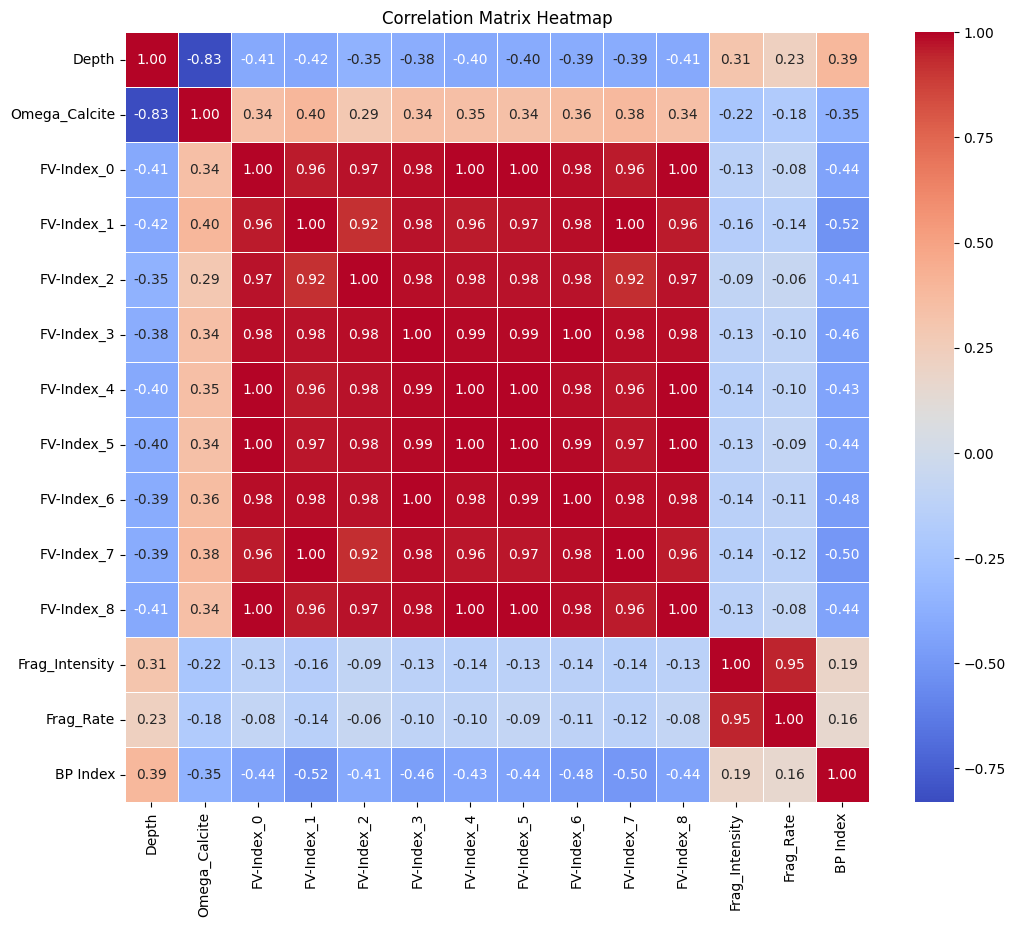

In [37]:
# Compute the correlation matrix
correlation_matrix = merged_tests[['Depth', 'Omega_Calcite', 'FV-Index_0', 'FV-Index_1', 'FV-Index_2', 'FV-Index_3', 'FV-Index_4', 'FV-Index_5', 'FV-Index_6', 'FV-Index_7', 'FV-Index_8', 'Frag_Intensity', 'Frag_Rate', 'BP Index']].corr()

# Create a DataFrame for the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation Matrix Heatmap (Prev calculations)

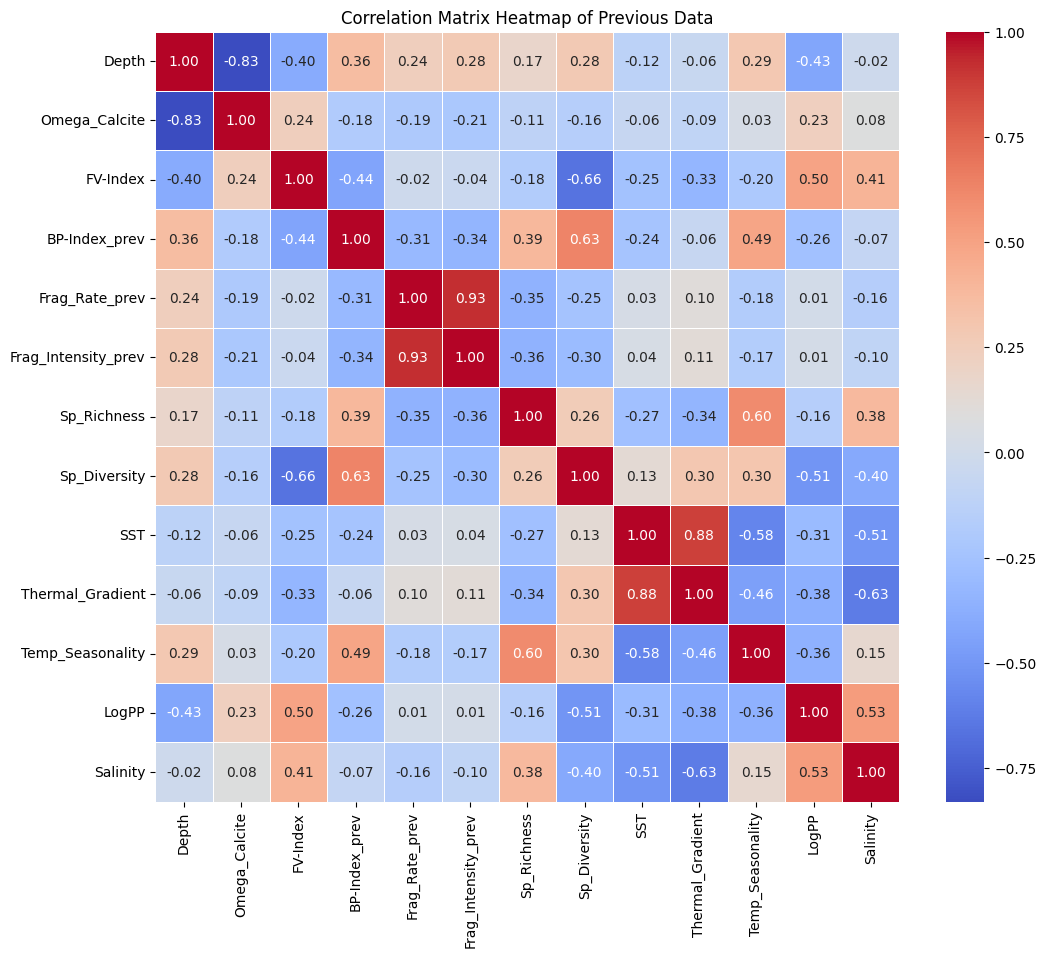

In [40]:
# Compute the correlation matrix
correlation_matrix_base = test_data_2[['Depth', 'Omega_Calcite', 'FV-Index', 'BP-Index_prev',
       'Frag_Rate_prev', 'Frag_Intensity_prev',  'Sp_Richness',
       'Sp_Diversity', 'SST', 'Thermal_Gradient',
       'Temp_Seasonality', 'LogPP', 'Salinity']].corr()

# Create a DataFrame for the correlation matrix
correlation_df_base = pd.DataFrame(correlation_matrix_base)

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df_base, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Previous Data')
plt.show()

### Correlation Matrix Combined (New & Prev)

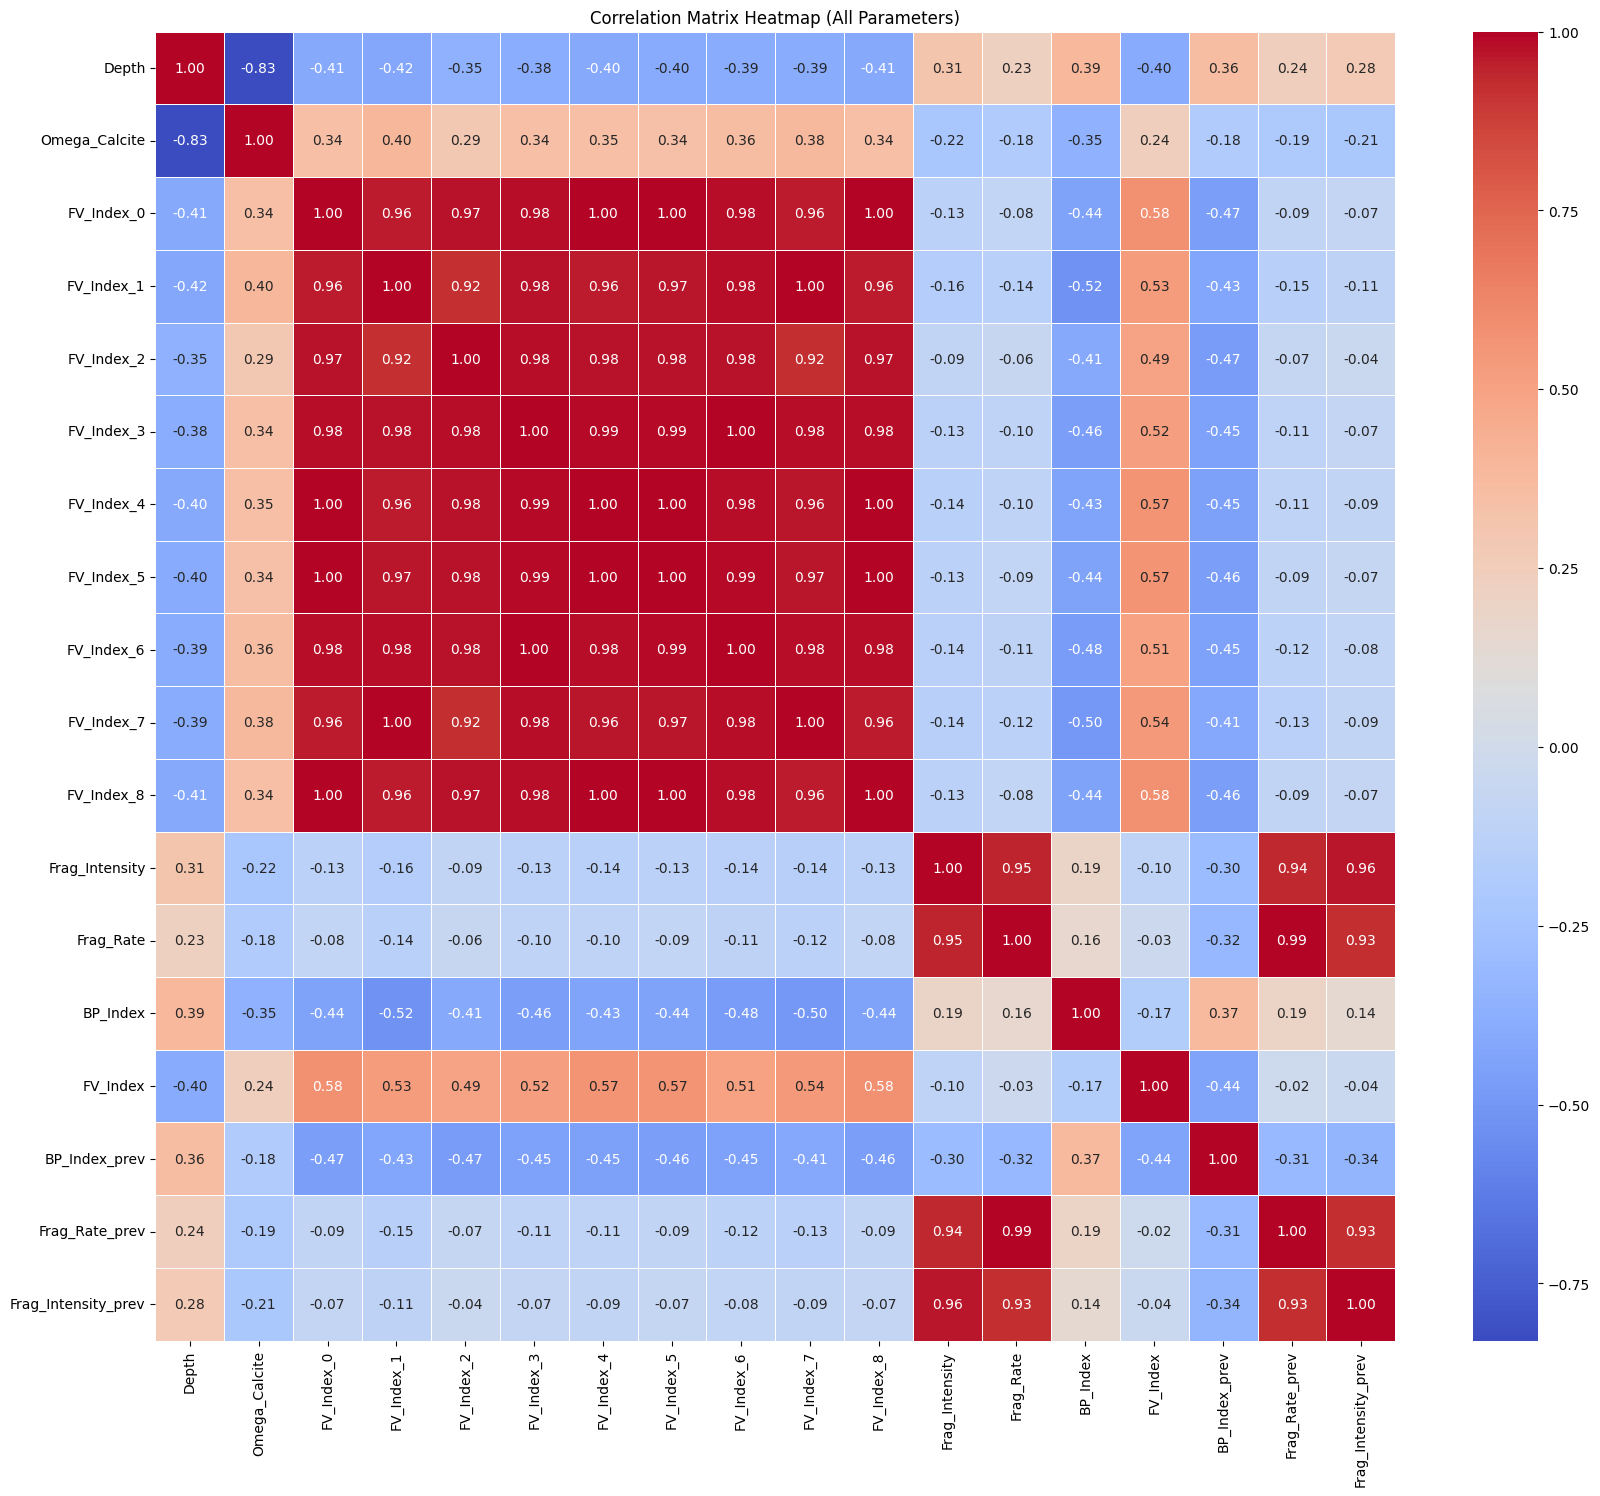

In [90]:
from scipy.stats import pearsonr

# Define the variables of interest
variables = ['Depth', 'Omega_Calcite', 'FV_Index_0', 'FV_Index_1', 'FV_Index_2', 'FV_Index_3',
             'FV_Index_4', 'FV_Index_5', 'FV_Index_6', 'FV_Index_7', 'FV_Index_8',
             'Frag_Intensity', 'Frag_Rate', 'BP_Index', 
             'FV_Index', 'BP_Index_prev', 'Frag_Rate_prev',
             'Frag_Intensity_prev',]

# Initialize lists to store the results
r_values = []
r_squared_values = []
p_values = []

# Compute the correlation coefficients, R-squared values, and p-values
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            r, p = pearsonr(merged_tests_all[var1], merged_tests_all[var2])
            r_squared = r**2
            r_values.append((var1, var2, r))
            r_squared_values.append((var1, var2, r_squared))
            p_values.append((var1, var2, p))

# Create DataFrames for the results
r_df = pd.DataFrame(r_values, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient'])
r_squared_df = pd.DataFrame(r_squared_values, columns=['Variable 1', 'Variable 2', 'R-squared'])
p_df = pd.DataFrame(p_values, columns=['Variable 1', 'Variable 2', 'P-value'])

# Merge the DataFrames
results_df = pd.merge(r_df, r_squared_df, on=['Variable 1', 'Variable 2'])
results_df = pd.merge(results_df, p_df, on=['Variable 1', 'Variable 2'])

# Compute the correlation matrix for the heatmap
correlation_matrix_all = merged_tests_all[variables].corr()

# Create a DataFrame for the correlation matrix
correlation_df_all = pd.DataFrame(correlation_matrix_all)

# Generate a heatmap
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_df_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (All Parameters)')
plt.show()

In [91]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# View 'Correlation Coefficient', 'R-squared', and 'P-value'
results_df

,Variable 1,Variable 2,Correlation Coefficient,R-squared,P-value
0,Depth,Omega_Calcite,-0.830126,0.689109,7.362846e-17
1,Depth,FV_Index_0,-0.405783,0.164660,1.067451e-03
2,Depth,FV_Index_1,-0.419328,0.175836,6.928185e-04
3,Depth,FV_Index_2,-0.354921,0.125969,4.646681e-03
4,Depth,FV_Index_3,-0.379926,0.144344,2.320986e-03
...,...,...,...,...,...
301,Frag_Intensity_prev,Frag_Rate,0.926269,0.857974,4.113667e-27
302,Frag_Intensity_prev,BP_Index,0.143633,0.020631,2.653910e-01
303,Frag_Intensity_prev,FV_Index,-0.038937,0.001516,7.638208e-01
304,Frag_Intensity_prev,BP_Index_prev,-0.338542,0.114611,7.115117e-03


### Checking multicolllinearity in environmental parameters

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the exogenous (X) variables
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'Thermal_Gradient', 'Temp_Seasonality', 'LogPP', 'Salinity']]

# Add a constant term to the predictors
X = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Variable          VIF
0              const  5876.264973
1              Depth     8.367551
2      Omega_Calcite     7.225370
3           Latitude    10.401253
4        Sp_Richness     3.557216
5       Sp_Diversity     2.062225
6                SST     9.301394
7   Thermal_Gradient     6.754551
8   Temp_Seasonality     8.061021
9              LogPP     4.881904
10          Salinity     3.233961


In [ ]:
# Drop collinear parameters (except parameters of interest) and rerun VIF

# Drop specific environmental parameters
X.drop(['Latitude', 'Thermal_Gradient', 'Temp_Seasonality'], inplace=True, axis=1)

# Add a constant term to the predictors
X = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable          VIF
0          const  4350.158644
1          Depth     6.366227
2  Omega_Calcite     4.791772
3    Sp_Richness     1.964094
4   Sp_Diversity     1.764736
5            SST     1.712584
6          LogPP     3.052026
7       Salinity     3.083789


### Multiple Regression Model

In [ ]:
import statsmodels.api as sm

# Define the endogenous (Y) and exogenous (X) variables
Y = merged_tests_all[['FV_Index_0', 'FV_Index_1', 'Frag_Intensity', 'Frag_Rate', 'BP_Index']]
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']]

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the multiple linear regression model for each dependent variable
models = {}
for col in Y.columns:
    model = sm.OLS(Y[col], X).fit()
    models[col] = model
    print(f'Regression results for {col}:')
    print(model.summary())
    print('\n')

# Extract the adjusted R-squared values
adjusted_r_squared = {col: model.rsquared_adj for col, model in models.items()}
print('Adjusted R-squared values:')
print(adjusted_r_squared)

Regression results for FV_Index_0:
                            OLS Regression Results                            
Dep. Variable:             FV_Index_0   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     10.69
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           2.33e-08
Time:                        15:27:20   Log-Likelihood:                0.76365
No. Observations:                  62   AIC:                             14.47
Df Residuals:                      54   BIC:                             31.49
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

### Structural Equation Modeling

In [ ]:
from semopy import Model, Optimizer

# Define the endogenous (Y) and exogenous (X) variables
Y = merged_tests_all[['FV_Index_0', 'FV_Index_1', 'Frag_Intensity', 'Frag_Rate', 'BP_Index']]
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']]

# Combine X and Y into a single DataFrame for SEM
data = pd.concat([X, Y], axis=1)

# Define the SEM model
model_desc = """
FV_Index_0 ~  Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST +  LogPP + Salinity
FV_Index_1 ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST +  LogPP + Salinity
Frag_Intensity ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
Frag_Rate ~  Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
BP_Index ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
"""

# Create and fit the SEM model
model = Model(model_desc)
model.load_dataset(data)
opt = Optimizer(model)
opt.optimize()

# Get the results
estimates = model.inspect()
print(estimates)

# Get the model fit indices
fit_indices = model.fit()
import pandas as pd
from semopy import Model, Optimizer

# Define the endogenous (Y) and exogenous (X) variables
Y = merged_tests_all[['FV_Index_0', 'FV_Index_1', 'Frag_Intensity', 'Frag_Rate', 'BP_Index']]
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']]

# Combine X and Y into a single DataFrame for SEM
data = pd.concat([X, Y], axis=1)

# Define the SEM model
model_desc = """
FV_Index_0 ~  Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST +  LogPP + Salinity
FV_Index_1 ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST +  LogPP + Salinity
Frag_Intensity ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
Frag_Rate ~  Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
BP_Index ~ Depth + Omega_Calcite + Latitude + Sp_Richness + Sp_Diversity + SST + LogPP + Salinity
"""

# Create and fit the SEM model
model = Model(model_desc)
model.load_dataset(data)
opt = Optimizer(model)
opt.optimize()

# Get the results
estimates = model.inspect()
print(estimates)

# Get the model fit indices
fit_indices = model.fit()
print(fit_indices)

              lval  op            rval   Estimate   Std. Err   z-value       p-value
0       FV_Index_0   ~           Depth   0.000000   0.000109  0.000000  1.000000e+00
1       FV_Index_0   ~   Omega_Calcite   0.000000   0.529447  0.000000  1.000000e+00
2       FV_Index_0   ~        Latitude   0.000000   0.006243  0.000000  1.000000e+00
3       FV_Index_0   ~     Sp_Richness   0.000000   0.010023  0.000000  1.000000e+00
4       FV_Index_0   ~    Sp_Diversity   0.000000   0.189984  0.000000  1.000000e+00
5       FV_Index_0   ~             SST   0.000000   0.037991  0.000000  1.000000e+00
6       FV_Index_0   ~           LogPP   0.000000   0.306559  0.000000  1.000000e+00
7       FV_Index_0   ~        Salinity   0.000000   0.057307  0.000000  1.000000e+00
8       FV_Index_1   ~           Depth   0.000000   0.000010  0.000000  1.000000e+00
9       FV_Index_1   ~   Omega_Calcite   0.000000   0.047687  0.000000  1.000000e+00
10      FV_Index_1   ~        Latitude   0.000000   0.000562  0.0

In [55]:
merged_tests_all.to_csv('dissolution_indices.csv')

In [42]:
# from sklearn.cross_decomposition import PLSRegression

# # Define the endogenous (Y) and exogenous (X) variables
# Y = merged_tests_all[['FV-Index_0', 'FV-Index_1', 'FV-Index_2', 
#                   'FV-Index_3', 'FV-Index_4', 'FV-Index_5', 
#                   'FV-Index_6', 'FV-Index_7', 'FV-Index_8',
#                   'Frag_Intensity', 'Frag_Rate', 'BP Index',
#                   ]]
# X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude',
#                   'Sp_Richness', 'Sp_Diversity', 'SST', 
#                   'Thermal_Gradient', 'Temp_Seasonality', 'LogPP', 'Salinity'
#                 ]]

# # Perform PLSR
# pls = PLSRegression(n_components=2)
# pls.fit(X, Y)

# # Get the PLSR results
# Y_pred = pls.predict(X)
# pls_results = pd.DataFrame(Y_pred, columns=Y.columns)

# merged_tests_all_copy = merged_tests_all.copy()

# # Add the PLSR results to the merged_tests_2 DataFrame
# for col in pls_results.columns:
#     merged_tests_all_copy[f'PLSR_{col}'] = pls_results[col]

# # Show full df column length
# pd.set_option('max_colwidth', None)

# # Display the PLSR results
# merged_tests_all_copy.head()

In [44]:
# from sklearn.cross_decomposition import PLSRegression
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import matplotlib.pyplot as plt

# # Define the endogenous (Y) and exogenous (X) variables
# Y = merged_tests_all[['FV-Index_0', 'FV-Index_1', 'FV-Index_2', 
#                       'FV-Index_3', 'FV-Index_4', 'FV-Index_5', 
#                       'FV-Index_6', 'FV-Index_7', 'FV-Index_8',
#                       'Frag_Intensity', 'Frag_Rate', 'BP Index']]
# X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude',
#                       'Sp_Richness', 'Sp_Diversity', 'SST', 
#                       'Thermal_Gradient', 'Temp_Seasonality', 'LogPP', 'Salinity']]

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Perform PLSR
# pls = PLSRegression(n_components=2)
# pls.fit(X_train, Y_train)

# # Get the PLSR results for the testing set
# Y_test_pred = pls.predict(X_test)
# pls_test_results = pd.DataFrame(Y_test_pred, columns=Y.columns, index=X_test.index)

# # Add the PLSR results to the test set DataFrame
# merged_tests_all_copy = merged_tests_all.copy()
# for col in pls_test_results.columns:
#     merged_tests_all_copy.loc[X_test.index, f'PLSR_{col}'] = pls_test_results[col]

# # Show full df column length
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)

# # Display the PLSR results
# print(merged_tests_all_copy.head())

# # Now, you can use the test results for further analysis
# # For example, creating Ceres plots for Depth and Omega_Calcite using the test results

# # Rename columns to replace hyphens with underscores
# merged_tests_all_copy.columns = merged_tests_all_copy.columns.str.replace('-', '_')

# # Define the PLSR indices
# plsr_indices = ['PLSR_FV_Index_1', 'PLSR_Frag_Intensity', 'PLSR_Frag_Rate', 'PLSR_BP_Index']

# # Create a 2x2 plot for Depth (PLSR Test Values)
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# # Plot Ceres plots for each index vs Depth (PLSR Test Values)
# for i, index in enumerate(plsr_indices):
#     row, col = divmod(i, 2)
#     model = smf.ols(f'{index} ~ Depth + Omega_Calcite + Sp_Richness + Sp_Diversity + SST + Thermal_Gradient + Latitude + Temp_Seasonality + LogPP + Salinity', data=merged_tests_all_copy.loc[X_test.index]).fit()
    
#     # Ceres plot for Depth
#     sm.graphics.plot_ccpr(model, 'Depth', ax=axes[row, col])
#     axes[row, col].set_title(f'Ceres Plot for {index} ~ Depth (Test Values)')

# plt.tight_layout()
# plt.show()

# # Create a 2x2 plot for Omega Calcite (PLSR Test Values)
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# # Plot Ceres plots for each index vs Omega Calcite (PLSR Test Values)
# for i, index in enumerate(plsr_indices):
#     row, col = divmod(i, 2)
#     model = smf.ols(f'{index} ~ Depth + Omega_Calcite + Sp_Richness + Sp_Diversity + SST + Thermal_Gradient + Latitude + Temp_Seasonality + LogPP + Salinity', data=merged_tests_all_copy.loc[X_test.index]).fit()
    
#     # Ceres plot for Omega Calcite
#     sm.graphics.plot_ccpr(model, 'Omega_Calcite', ax=axes[row, col])
#     axes[row, col].set_title(f'Ceres Plot for {index} ~ Omega_Calcite (Test Values)')

# plt.tight_layout()
# plt.show()

In [45]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)

# # Display the PLSR results
# merged_tests_all_copy.head()

In [46]:
# # Compute the correlation matrix after PLSR
# correlation_matrix_all_plsr = merged_tests_all_copy[['Depth', 'Omega_Calcite', 'FV-Index_0', 'FV-Index_1', 'FV-Index_2',
#        'FV-Index_3', 'FV-Index_4', 'FV-Index_5',
#        'FV-Index_6', 'FV-Index_7', 'FV-Index_8',
#        'Frag_Intensity', 'Frag_Rate', 'BP Index',]].corr()

# # Create a DataFrame for the correlation matrix
# correlation_df_all_plsr = pd.DataFrame(correlation_matrix_all_plsr)

# # Generate a heatmap
# plt.figure(figsize=(20, 17))
# sns.heatmap(correlation_df_all_plsr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap (No-PLSR)')
# plt.show()

In [47]:
# # Compute the correlation matrix after PLSR
# correlation_matrix_all_plsr = merged_tests_all_copy[['Depth', 'Omega_Calcite', 'PLSR_FV-Index_0', 'PLSR_FV-Index_1', 'PLSR_FV-Index_2',
#        'PLSR_FV-Index_3', 'PLSR_FV-Index_4', 'PLSR_FV-Index_5',
#        'PLSR_FV-Index_6', 'PLSR_FV-Index_7', 'PLSR_FV-Index_8',
#        'PLSR_Frag_Intensity', 'PLSR_Frag_Rate', 'PLSR_BP Index',]].corr()

# # Create a DataFrame for the correlation matrix
# correlation_df_all_plsr = pd.DataFrame(correlation_matrix_all_plsr)

# # Generate a heatmap
# plt.figure(figsize=(20, 17))
# sns.heatmap(correlation_df_all_plsr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap (PLSR)')
# plt.show()

In [48]:
# # Correlation values before and after PLSR
# correlations = {
#     'Index': ['Frag Intensity', 'Frag Rate', 'BP-Index', 'FV-Index'],
#     'Depth Before PLSR': [0.31, 0.23, 0.39, -0.42],
#     'Depth After PLSR': [0.36, 0.31, 0.53, -0.60],
#     'Calcite Before PLSR': [-0.22, -0.18, -0.35, 0.40],
#     'Calcite After PLSR': [-0.56, -0.52, -0.67, 0.58]
# }

# # Convert to DataFrame
# correlation_df = pd.DataFrame(correlations)

# # Calculate R-squared values
# correlation_df['Depth R^2 Before PLSR'] = correlation_df['Depth Before PLSR'] ** 2
# correlation_df['Depth R^2 After PLSR'] = correlation_df['Depth After PLSR'] ** 2
# correlation_df['Calcite R^2 Before PLSR'] = correlation_df['Calcite Before PLSR'] ** 2
# correlation_df['Calcite R^2 After PLSR'] = correlation_df['Calcite After PLSR'] ** 2

# # Display the R-squared values
# correlation_df[['Index', 'Depth R^2 Before PLSR', 'Depth R^2 After PLSR', 'Calcite R^2 Before PLSR', 'Calcite R^2 After PLSR']]

In [49]:
merged_tests_all_copy.columns

NameError: name 'merged_tests_all_copy' is not defined

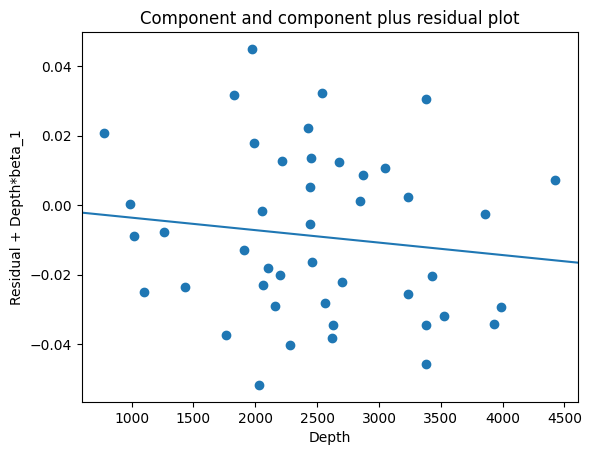

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import matplotlib.pyplot as plt

# # Rename columns to remove hyphens
# merged_tests_all_copy.columns = merged_tests_all_copy.columns.str.replace('-', '_')

# # Example: Ceres plot for PLSR_FV_Index_1
# # Fit a linear model
# depth_model = smf.ols('PLSR_FV_Index_1 ~ Depth + Omega_Calcite + Sp_Richness + Sp_Diversity + SST + Thermal_Gradient + Latitude + Temp_Seasonality + LogPP + Salinity', data=merged_tests_all_copy).fit()

# # Create the Ceres plot
# fig = sm.graphics.plot_ccpr(depth_model, "Depth")
# plt.show()

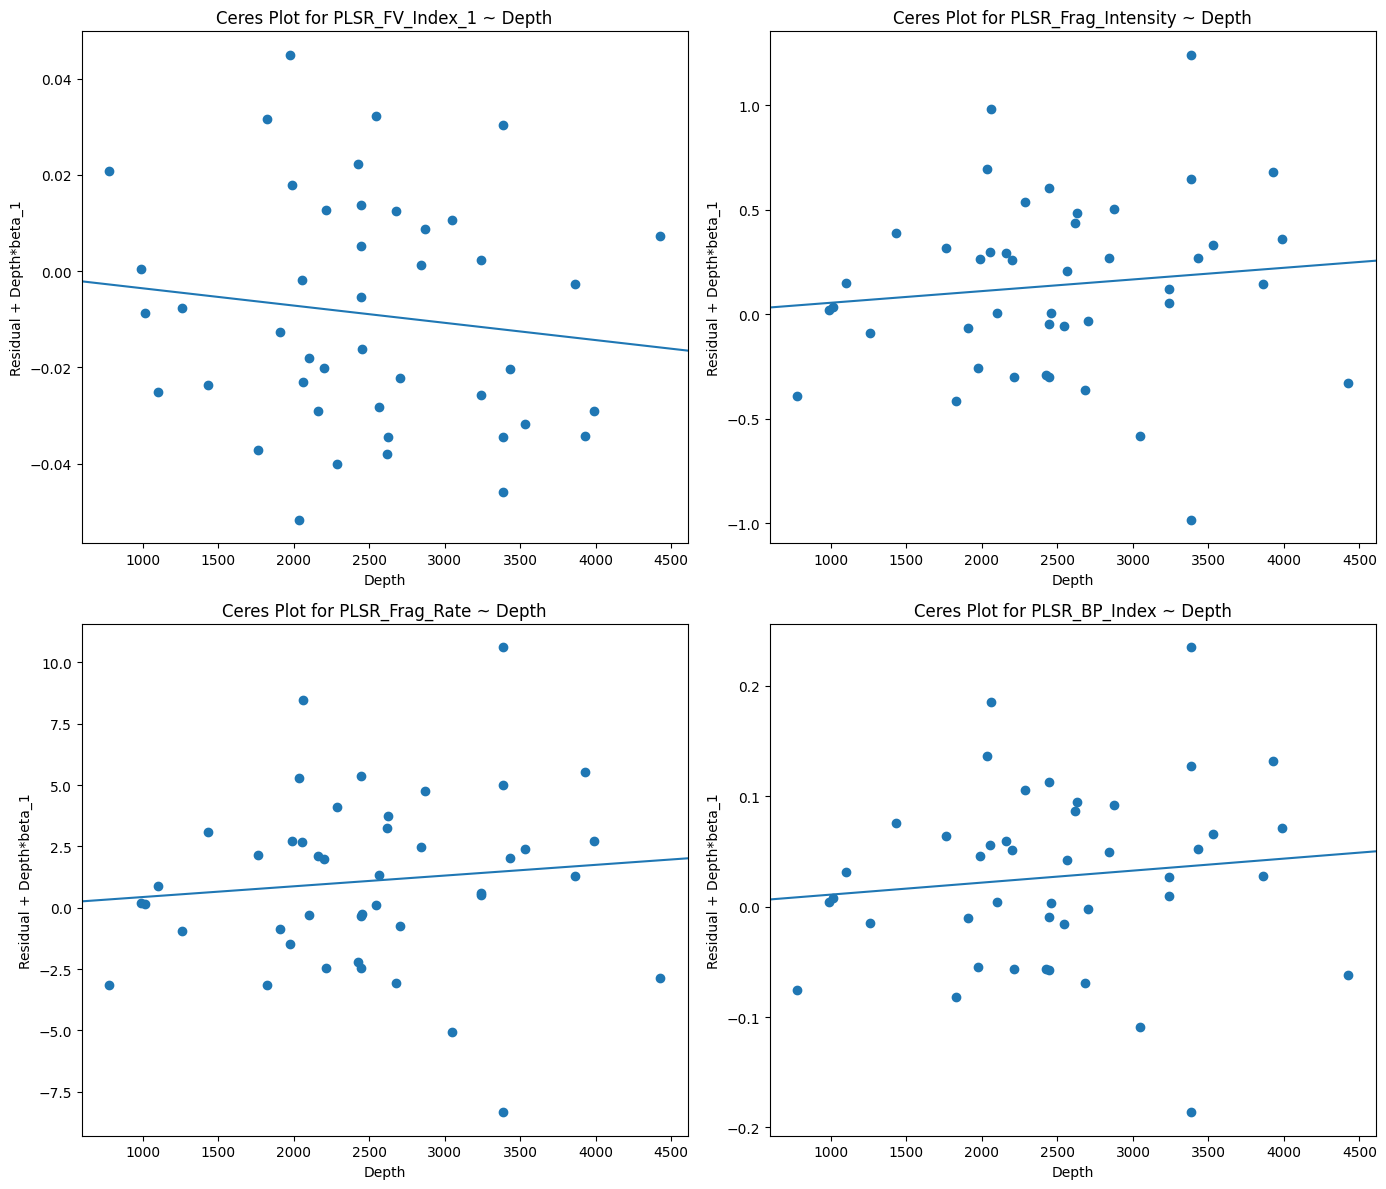

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import matplotlib.pyplot as plt

# # Rename columns to remove hyphens
# merged_tests_all_copy.columns = merged_tests_all_copy.columns.str.replace('-', '_')
# merged_tests_all_copy.columns = merged_tests_all_copy.columns.str.replace(' ', '_')

# # Define the indices and environmental parameters
# indices = ['PLSR_FV_Index_1', 'PLSR_Frag_Intensity', 'PLSR_Frag_Rate', 'PLSR_BP_Index']
# env_params = 'Depth + Omega_Calcite + Sp_Richness + Sp_Diversity + SST + Thermal_Gradient + Latitude + Temp_Seasonality + LogPP + Salinity'

# # Create a 2x2 plot for Depth
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# # Plot Ceres plots for each index vs Depth
# for i, index in enumerate(indices):
#     row, col = divmod(i, 2)
#     model = smf.ols(f'{index} ~ {env_params}', data=merged_tests_all_copy).fit()
    
#     # Ceres plot for Depth
#     sm.graphics.plot_ccpr(model, 'Depth', ax=axes[row, col])
#     axes[row, col].set_title(f'Ceres Plot for {index} ~ Depth')

# plt.tight_layout()
# plt.show()

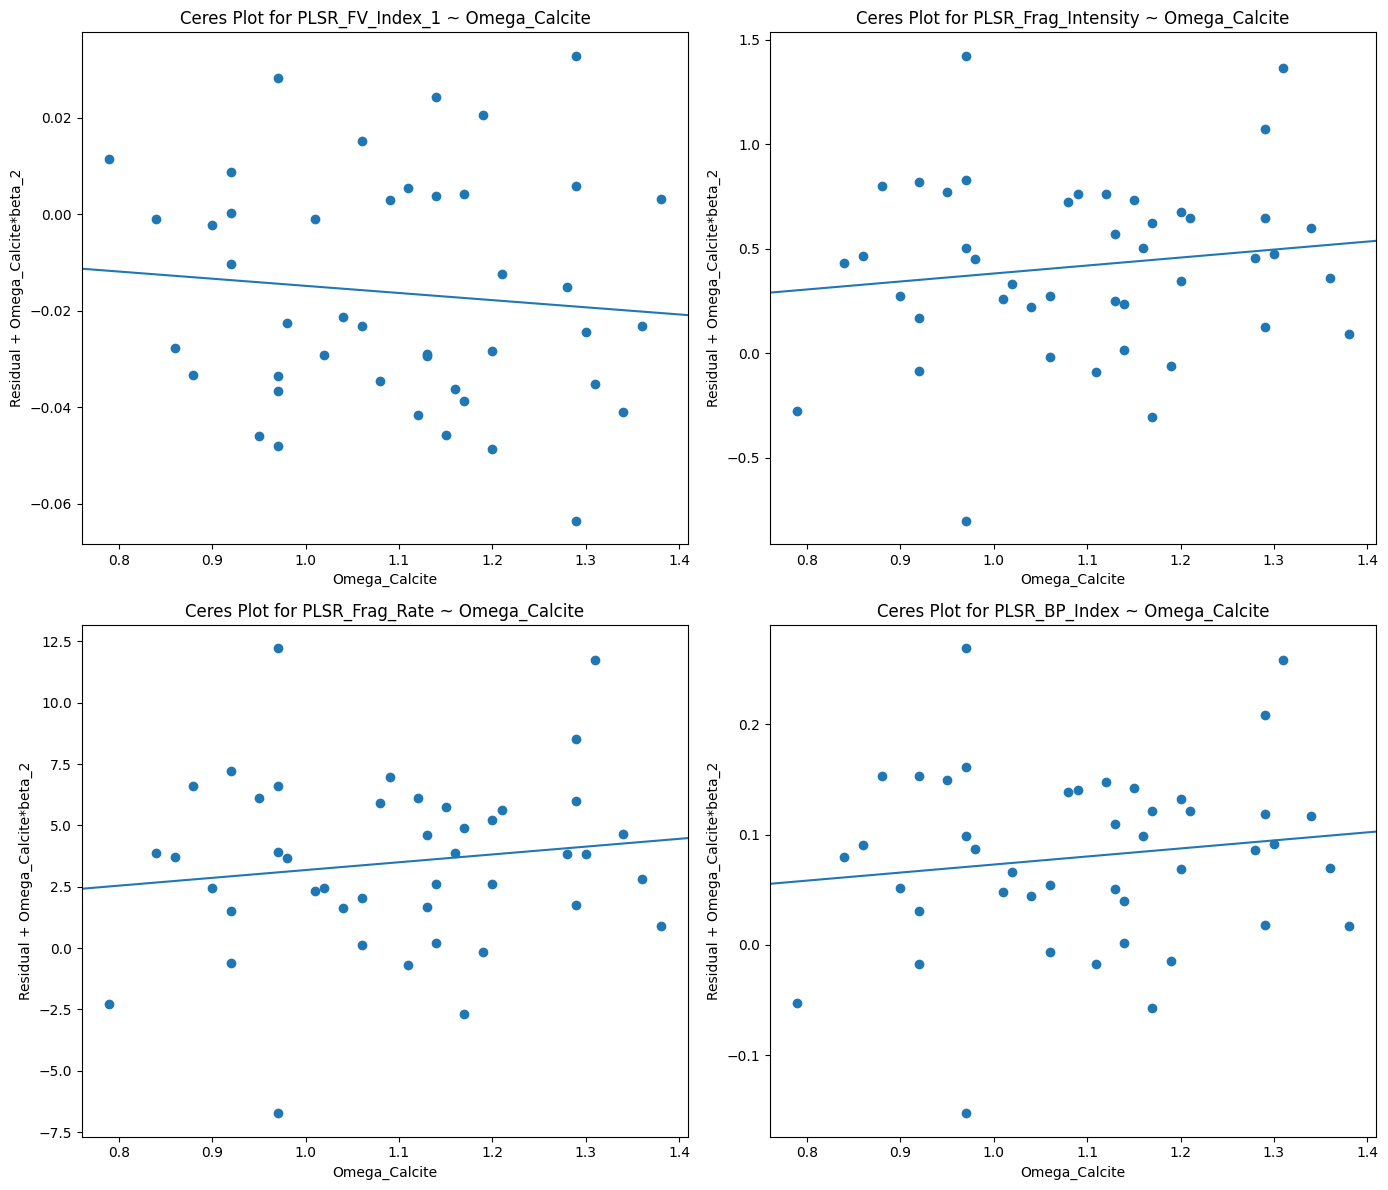

In [ ]:
# # Create a 2x2 plot for Omega Calcite
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# # Plot Ceres plots for each index vs Omega Calcite
# for i, index in enumerate(indices):
#     row, col = divmod(i, 2)
#     model = smf.ols(f'{index} ~ {env_params}', data=merged_tests_all_copy).fit()
    
#     # Ceres plot for Omega Calcite
#     sm.graphics.plot_ccpr(model, 'Omega_Calcite', ax=axes[row, col])
#     axes[row, col].set_title(f'Ceres Plot for {index} ~ Omega_Calcite')

# plt.tight_layout()
# plt.show()

In [ ]:

# final_fv.to_csv("fvi_2.csv", index=False)
# # df_manu[df_manu['FV-Index', 'FV-Index']]